# BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Unsupervised Machine Learning</h1>

---

<center><h2>Lesson: 10</h2></center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/lessons/10_Unsupervised_Machine_Learning.ipynb)



### Introduction
Unsupervised machine learning refers to a type of machine learning where the model learns from unlabeled data. Unlike supervised learning, there are no target labels for the model to predict. Instead, the model identifies patterns and structures within the data.

The goal of unsupervised learning is to find hidden patterns or intrinsic structures in the data. Since the data is unlabeled, the model must determine relationships and groupings without any guidance. Unsupervised learning is particularly useful when we do not know what we are looking for in the data or when we want to explore the data to find inherent groupings or reduce complexity.

There are two main types of unsupervised learning:

1. **Clustering**: Grouping data points based on similarity. Clustering algorithms attempt to find clusters or groups of similar data points in the dataset. This can be useful for customer segmentation, market research, and understanding natural groupings within data. Examples of clustering algorithms include k-means, hierarchical clustering, and DBSCAN.

2. **Dimensionality Reduction**: Reducing the number of features in the dataset while retaining important information. This is particularly useful when dealing with high-dimensional data that can be difficult to visualize or analyze. Dimensionality reduction techniques help in compressing data, removing noise, and making the analysis more efficient. Examples of dimensionality reduction techniques include Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Independent Component Analysis (ICA), and Factor Analysis.

Common applications of unsupervised learning include clustering, association, and dimensionality reduction. In this lesson, we will explore five popular unsupervised learning techniques: **k-means clustering**, **hierarchical clustering**, **DBSCAN**, **principal component analysis (PCA)**, and **t-distributed stochastic neighbor embedding (t-SNE)**.

### When to Use Clustering vs Dimensionality Reduction

**Clustering Use Cases:**
- Customer segmentation: Group customers based on purchasing behavior, demographics, etc.
- Disease subtyping: Identify distinct patient groups with similar symptoms/biomarkers
- Image segmentation: Group similar pixels to identify objects/regions
- Document categorization: Group similar documents by topic/content
- Network analysis: Find communities in social networks

**Dimensionality Reduction Use Cases:**
- Visualizing high-dimensional data: Reduce many features to 2-3 dimensions for plotting
- Feature extraction: Combine correlated features into meaningful components
- Noise reduction: Remove less important features while preserving key patterns
- Data compression: Reduce storage/computation needs while keeping important information
- Preprocessing for other algorithms: Improve performance by reducing input dimensions


### Pros and Cons of Unsupervised Learning Methods

**Dimensionality Reduction**

*Pros:*
- Reduces computational complexity and storage requirements
- Helps avoid overfitting by removing noise and redundant features
- Makes visualization possible for high-dimensional data
- Can improve model performance by removing collinear features
- Reduces training time for machine learning models

*Cons:*
- May lose some information in the reduction process
- Reduced features can be harder to interpret
- Finding the optimal number of dimensions can be challenging
- Some methods (like t-SNE) can be computationally expensive
- Risk of removing important features if not done carefully

**Clustering**

*Pros:*
- Discovers natural groupings in data without labels
- Useful for customer segmentation and pattern discovery
- Can handle various types of data structures
- Provides insights into data organization
- Helps identify outliers and anomalies

*Cons:*
- Difficult to validate results without ground truth
- Sensitive to initial conditions and parameters
- May find clusters that aren't meaningful
- Different algorithms can give different results
- Challenging to determine optimal number of clusters


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ImportError:
    %pip install seaborn
    import seaborn as sns

try:
    from sklearn.cluster import KMeans, DBSCAN
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    from sklearn.datasets import fetch_openml
except ImportError:
    %pip install scikit-learn
    from sklearn.cluster import KMeans, DBSCAN
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    from sklearn.datasets import fetch_openml

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Load Dataset

For this lesson, we will use the **Diabetes** dataset, a biomedical dataset that contains information about various features related to diabetes diagnosis. The dataset includes the following features:
- preg: Number of pregnancies
- plas: Plasma glucose concentration
- pres: Diastolic blood pressure (mm Hg)
- skin: Triceps skin fold thickness (mm)
- insu: 2-Hour serum insulin (mu U/ml)
- mass: Body mass index (weight in kg/(height in m)^2)
- pedi: Diabetes pedigree function
- age: Age (years)
- class: Diabetes diagnosis (0 = tested negative, 1 = tested positive)
This dataset has multiple numerical features, making it suitable for dimensionality reduction techniques like t-SNE, which can capture the non-linear relationships between features and reveal hidden structures more effectively.

In [2]:
# Load the Diabetes dataset
data = fetch_openml(data_id=37, as_frame=True)  # Load the dataset from OpenML
df = data.frame

# Convert class column to numeric (0 for negative, 1 for positive)
df['class'] = df['class'].map({'tested_negative': 0, 'tested_positive': 1})

# Display the first few rows of the dataset
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis (EDA)
Let's perform some exploratory data analysis to understand the structure of the dataset.

In [3]:
# Summary statistics
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


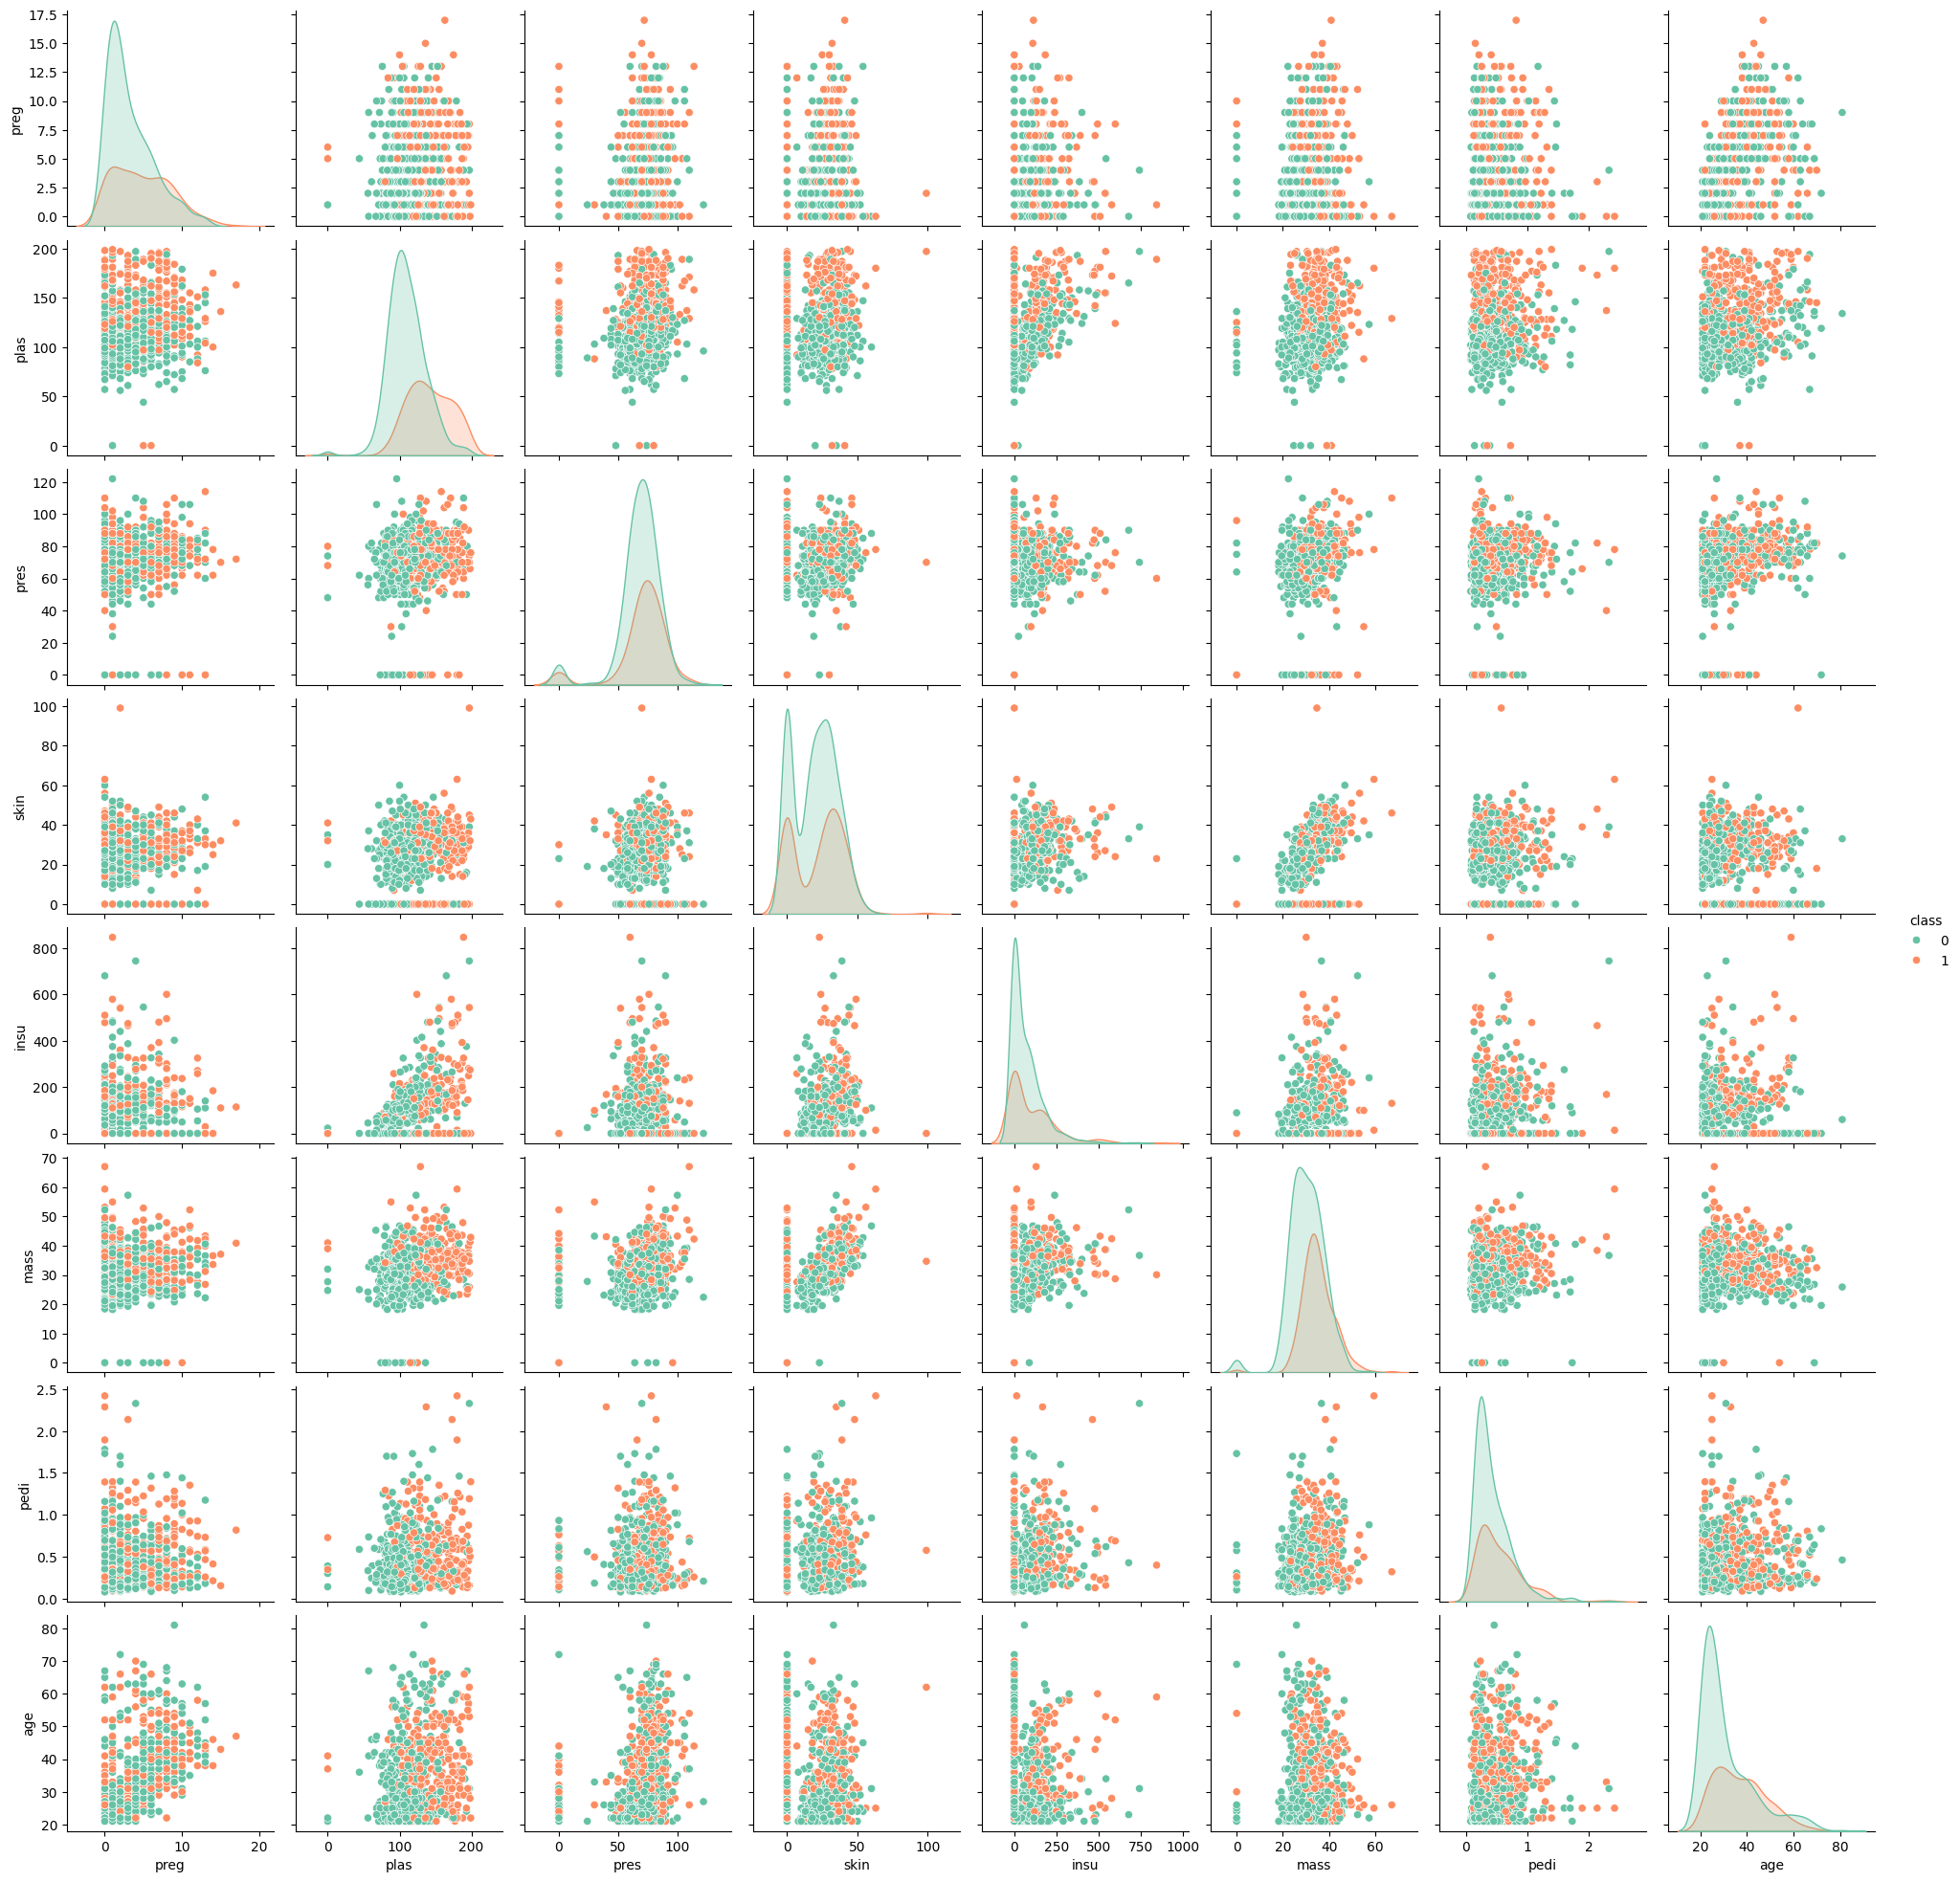

In [4]:
# Pairplot to visualize relationships between a subset of features, colored by class
sns.pairplot(df.iloc[:, :], hue='class', palette='Set2')
plt.show()

### Dimensionality Reduction
Dimensionality reduction is a crucial technique in machine learning and data analysis that transforms high-dimensional data into a lower-dimensional representation while preserving important information. This process helps to:

1. **Visualization**: Convert high-dimensional data into 2D or 3D representations that humans can easily visualize and interpret
2. **Computational Efficiency**: Reduce computational complexity and memory requirements by working with fewer dimensions
3. **Noise Reduction**: Remove redundant features and noise that might not contribute meaningful information
4. **Feature Selection**: Identify the most important features or combinations of features

There are two main categories of dimensionality reduction techniques:

**Linear Methods**:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- Factor Analysis

**Non-linear Methods**:
- t-Distributed Stochastic Neighbor Embedding (t-SNE)
- UMAP (Uniform Manifold Approximation and Projection)
- Autoencoders

In this notebook, we'll explore two popular techniques:
- PCA: A linear method that finds orthogonal directions of maximum variance
- t-SNE: A non-linear method that preserves local structure and is particularly good at revealing clusters


### Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique that transforms high-dimensional data into a new set of orthogonal features called principal components, which capture the maximum variance in the data.

Strengths of PCA:
- Simple to understand and implement
- Computationally efficient, especially for large datasets
- Preserves global structure and variance of the data
- Reduces noise by focusing on directions of maximum variance
- Useful for feature extraction and data compression
- Results are interpretable since components are linear combinations of original features

Weaknesses of PCA:
- Only captures linear relationships between features
- May lose important information if data has nonlinear patterns
- Sensitive to outliers and scaling of features
- Principal components can be hard to interpret in terms of original features
- Assumes orthogonality between components which may not reflect true data structure
- Cannot handle categorical variables directly

In [5]:
import plotly.express as px

# Remove the 'insu' column from the dataset
df_reduced = df.drop(columns=['skin','pres','insu'])

# Apply PCA to reduce the dataset to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_reduced.iloc[:, :-1])

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['class'] = df['class']

# Add original features to the DataFrame for hover information
for col in df_reduced.columns[:-1]:
    pca_df[col] = df_reduced[col]

# Visualize the PCA results using Plotly in 3D
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='class', title='3D PCA of Diabetes Dataset',
                    hover_data=df_reduced.columns[:-1])
fig.update_traces(marker=dict(size=3, line=dict(width=2, color='DarkSlateGrey')))  # Make the points smaller and add outline

fig.show()

### t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a nonlinear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional datasets. Unlike PCA, t-SNE focuses on preserving local structure and revealing clusters in the data.

Strengths of t-SNE:
- Excellent at preserving local structure and revealing clusters
- Can capture nonlinear relationships in the data
- Particularly effective for visualization in 2D or 3D
- Works well with high-dimensional data
- Can reveal patterns that linear methods like PCA might miss
- Good at separating clusters of different scales

Weaknesses of t-SNE:
- Computationally intensive, especially for large datasets
- Non-deterministic - different runs can produce different results
- Cannot meaningfully preserve global structure/distances
- Results depend heavily on hyperparameters (perplexity, learning rate)
- Can sometimes create artificial clusters from noise
- Not suitable for dimensionality reduction as a preprocessing step
- Difficult to project new data points into existing embedding


In [12]:
# Remove the 'insu' column from the dataset before applying t-SNE
df_reduced_tsne = df.drop(columns=['skin','pres','insu'])

# Apply t-SNE to reduce the dataset to 3 components with optimized parameters
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, max_iter=1000, random_state=44, n_jobs=-1)
tsne_components = tsne.fit_transform(df_reduced_tsne.iloc[:, :-1])

# Create a new DataFrame with the t-SNE components
tsne_df = pd.DataFrame(tsne_components, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_df['class'] = df['class']

# Add original features to the DataFrame for hover information
for col in df_reduced_tsne.columns[:-1]:
    tsne_df[col] = df_reduced_tsne[col]

# Visualize the t-SNE results using Plotly in 3D
fig = px.scatter_3d(tsne_df, x='Dim1', y='Dim2', z='Dim3', color='class', title='3D t-SNE Visualization of Diabetes Dataset',
                    hover_data=df_reduced_tsne.columns[:-1])
fig.update_traces(marker=dict(size=3, line=dict(width=2, color='DarkSlateGrey')))  # Make the points smaller and add outline

fig.show()

### K-Means Clustering
K-means is a popular clustering algorithm used to group data points into a predefined number of clusters. 
It works by iteratively assigning each data point to the cluster with the nearest centroid and then updating the centroids based on the new cluster assignments. 
The process continues until the centroids stabilize or a maximum number of iterations is reached.

How K-Means Clustering Works:
- Initialize k centroids randomly from the data points.
- Assign each data point to the nearest centroid, forming k clusters.
- Update the centroids by calculating the mean of all data points in each cluster.
- Reassign each data point to the nearest centroid based on the updated centroids.
- Repeat the update and reassignment steps until the centroids no longer change significantly or a maximum number of iterations is reached.
- The final clusters are formed based on the last assignment of data points to centroids.

#### Applying K-Means
We will apply k-means clustering to the Diabetes dataset and visualize the clusters.

In [13]:
# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
tsne_df['cluster'] = kmeans.fit_predict(tsne_df.iloc[:, :3])

# Visualize the clusters using three of the features in 3D
fig = px.scatter_3d(tsne_df, x='Dim1', y='Dim2', z='Dim3', color='cluster', title='3D K-Means Clustering of Diabetes Dataset',
                    hover_data=tsne_df.columns[:-1])
fig.update_traces(marker=dict(size=3, line=dict(width=2, color='DarkSlateGrey')))  # Make the points smaller and add outline
fig.show()

#### Cluster Analysis
Let's compare the clusters obtained with the actual diabetes diagnosis if available.

In [14]:
# Compare clusters with actual target labels if available
if 'class' in df.columns:
    comparison_table = pd.crosstab(tsne_df['class'], tsne_df['cluster'])
    print("Comparison of clusters with actual target labels:")
    print(comparison_table)
    print("\nThe rows represent the actual classes, and the columns represent the clusters assigned by K-Means.")
    print("Each cell value indicates the number of instances of the actual class that were assigned to the corresponding cluster.")

Comparison of clusters with actual target labels:
cluster    0    1
class            
0        164  336
1        201   67

The rows represent the actual classes, and the columns represent the clusters assigned by K-Means.
Each cell value indicates the number of instances of the actual class that were assigned to the corresponding cluster.


### Hierarchical Clustering
Hierarchical clustering is another popular clustering technique that builds a hierarchy of clusters. It can be represented using a dendrogram, which is a tree-like diagram that records the sequences of merges or splits.
The algorithm works by:
1. Starting with each data point as its own cluster
2. Finding the two closest clusters and merging them into a new cluster
3. Repeating step 2 until all points are in a single cluster
There are two main approaches:
- Agglomerative (bottom-up): Starts with individual points and merges them
- Divisive (top-down): Starts with one cluster and splits it recursively
The distance between clusters can be measured in different ways:
- Single linkage: Minimum distance between points in clusters
- Complete linkage: Maximum distance between points in clusters
- Average linkage: Average distance between all pairs of points
- Ward's method: Minimizes variance within clusters
The resulting hierarchy can be visualized as a dendrogram tree, where:
- Height shows the distance/dissimilarity between merged clusters
- Vertical lines represent clusters being merged
- Horizontal lines show the distance at which clusters merge

#### Applying Hierarchical Clustering
We will apply hierarchical clustering to the Diabetes dataset and visualize the dendrogram.

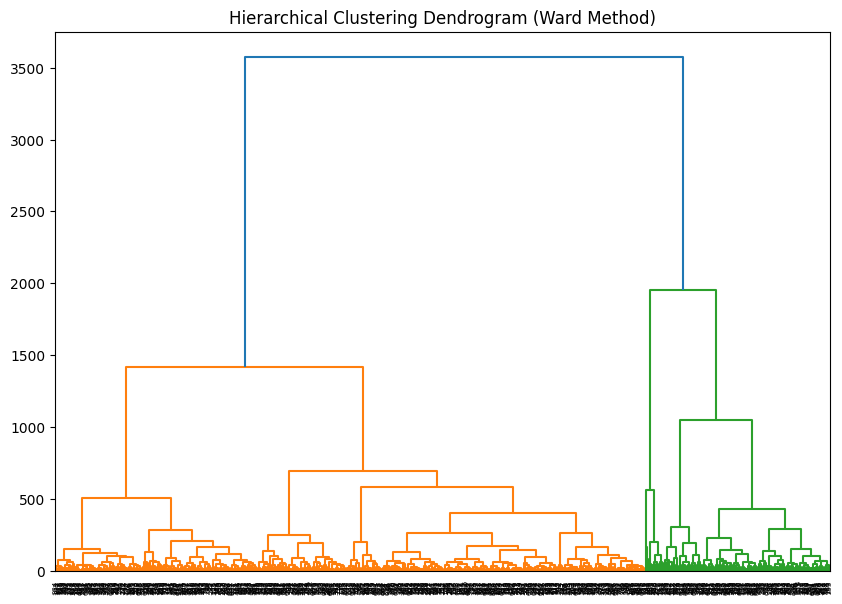

In [9]:
# Apply hierarchical clustering
linked = linkage(df.iloc[:, :-1], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.show()

#### Cutting the Dendrogram
We can cut the dendrogram to form a specified number of clusters and compare with the actual labels if available.

In [10]:
# Form flat clusters (e.g., 3 clusters)
# This uses the fcluster function to cut the hierarchical clustering dendrogram 
# into 3 distinct clusters and assigns each data point to one of these clusters
df['h_cluster'] = fcluster(linked, t=3, criterion='maxclust')

# Compare clusters with actual class labels if available
# If there is a 'target' column in the dataframe, create a cross-tabulation
# to compare how well the hierarchical clusters align with the true labels
if 'class' in df.columns:
    print(pd.crosstab(df['class'], df['h_cluster']))

h_cluster    1   2   3
class                 
0          418   6  76
1          167  12  89
